In [412]:
%%HTML
<style type="text/css">
.CodeMirror {width: 100vw}
.container {width: 95% !important}
.rendered_html {font-size:0.8em}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {font-size: 100%}
table td, table th {
border: 1px  black solid !important;
color: black !important;
background-color: white;
font-size:2.4em;
}
</style>

# XPath <img src="https://img.icons8.com/dotty/80/000000/code--v2.png" style="display:inline-block;vertical-align:middle;">

* Press `Space` to navigate through the slides
* Use `Shift+Space` to go back

# Introduction to XPath <img src="https://img.icons8.com/material/xml-transformer/80" style="display:inline-block;vertical-align:middle;">

* **XPath** is a syntax for defining parts of an XML document
* **XPath** uses path expressions to navigate in XML documents
* **XPath** contains a library of standard functions
* **XPath** is a major element used in **XSL**

# What is XPath?
* Language for addressing parts of an XML document
 * Used in **XSLT**, **XQuery**

* A dedicated and powerful expression language for forming queries based on the tree structure of an XML document.
* It is used to:
 * Locate nodes in a tree
 * Extract information
 * Provide basic operations over data: e.g., manipulation of strings, numbers and booleans

* Compact, non-XML syntax for use within URIs and XML attribute values
* Operates on the abstract, logical structure of the XML document

# XPath versions
* **W3C Recommendation**
 * XPATH 1.0 - (1999)
 * XPATH 2.0  – (2010) – backwards compatible

* **XPath 1.0**
 * considers a single XML document as a tree of nodes
 * Nodes have identity
 * Set of nodes  * unordered collection of nodes

* **XPath 2.0**
 *  More complex, is a superset of XPath 1.0
 *  More elaborate data model
 *  More functions
 *  It does not considers on a single document tree, but on arbitrary data sets
 *  These can be arranged in sequences of items – ordered sets

XPath defines 7 node types

|Root/Document Node |The root of the tree representing the entire document contents, represented by the "/" |
|:--|:--|
|Element |Element nodes are defined by pairs of start <title> and end tags </title> |
|Text |A character sequence in an element, comment, processing instruction, or namespace |
|Attribute |The name and value of an attribute in an element |
|Comment |Comments in an XML source document, such as <!-- model diagram --> |
|Processing Instruction |An instruction in the source document, such as the <?xml-stylesheet href=“book.xsl“ type="text/xsl"?> |
|Namespace |A namespace declaration |


# Basic Concepts
* **Node Types**
 * XML documents are treated as trees of nodes
 * The topmost element of the tree is called the root (or
document) node
 * XPath defines seven node types

* **Context Node**
 * Provides the starting point (current node) that is basis of path
navigation and evaluation
 * Default is the root (document)

* **Location Steps**
 *  Provides the directions
 *  Sequences the nodes
 *  The evaluation of each node provides the current context
 *  Example: `/node1/node2/node3`

In [264]:
%%file diagrams/diagram1
blockdiag {
  default_fontsize = 20;
  node_width = 200;
  class attribute [style = dashed];
  class text [style = dotted];
  orientation = portrait;
  name [class = "attribute"];
  name2 [class = "attribute"];
  theCourse [class = "attribute"];
  75 [class = "text"];
  name2 [label = "name"];
  mark2 [label = "MARK"];
  takenBy [class = "attribute"];
  ASSESMENTS -> STUDENT -> MARK  [label = "element"];
  ASSESMENTS -> COURSE -> name2 [label = "attribute"];
  COURSE -> takenBy [label = "attribute"];
  COURSE -> mark2 [label = "element"];
  STUDENT -> name [label = "attribute"];
  MARK -> 75 [label = "text"];
  MARK -> theCourse [label = "attribute"];
}

Writing diagrams/diagram1


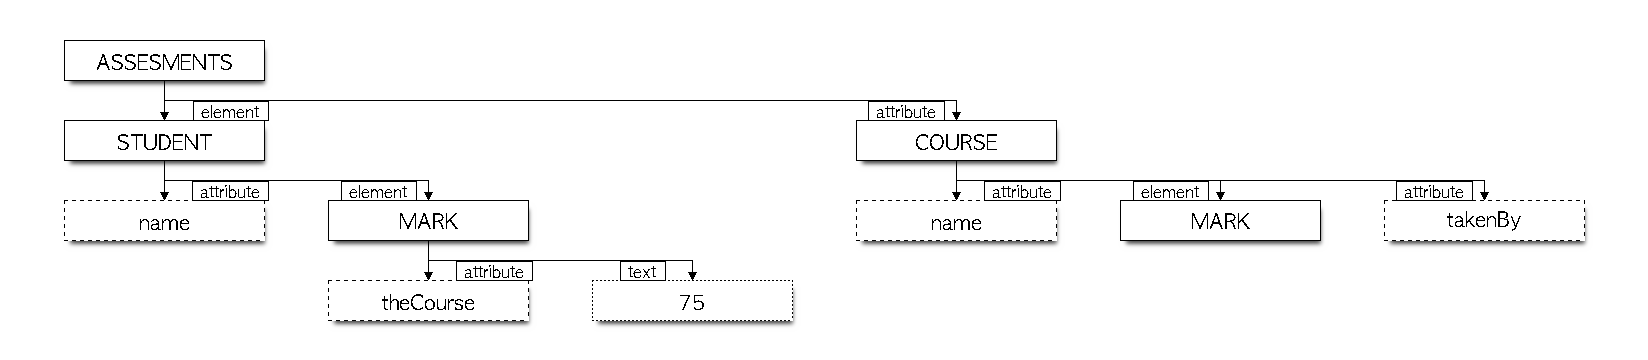

In [266]:
!blockdiag diagrams/diagram1
from IPython.display import Image
Image("diagrams/diagram1.png")

# Example Document

```XML
<ASSESSMENTS>
    <STUDENT name="Smith">
        <MARK theCourse="4BA1">75</MARK>
        <MARK theCourse="4BA5">99</MARK>
    </STUDENT>
    ...
    <COURSE name="4BA1" takenBy="Smith, Jones, ... ">
        <MARK>60</MARK>
    </COURSE>
...
</ASSESSMENTS>
```
<img src="diagrams/diagram1.png">

# Useful Properties of a Node
* **Name** (Except root, text and comment nodes)
 * Qualified by the namespace, such as <xm:term> -"xm" is the
namespace, "term" is the local part. They can be accessed by
using the functions name(), namespace-uri(), local-name().
* **String-value**
 * E.g. text if text node, comment text if comment node,
attribute value if attribute node.
 * It can be accessed by the string() function.

* **Child**: list of child nodes

* **Parent**: every node except root

* **Has-attribute**: list of attribute nodes associated with element node

* **Has-namespace**: list of namespace nodes associated with element node

# Data Types
* **XPath 1.0**
 * number : stored as a floating point
 * string : a sequence of characters
 * boolean : a true or false value
 * node set : an unordered collection of unique nodes

* **XPath 2.0**
 * Data types in XPATH 1.0 are pretty primitive
 * Supports data types taken from XML Schema
 * XPath 2.0 defines five additional datatypes:
    * anyAtomicType, untyped, untypedAtomic, dayTimeDuration and yearMonthDuration.

# Location Paths
* A location path (or path expression) identifies a set of
nodes within an XML document
* A location path consists of a series of steps
* Simple path descriptors are sequences of location
steps separated by slashes `/`
 * `bookstore/book`

* By default trying to match any child nodes from
current location
* Document Root:
 * A forward slash `/` at the start of a location path indicates
that the starting position for the context node is the
document `root` node

# Absolute & Relative Paths
* A location path can be absolute or relative.
* If the location path starts with the root node (/) then
you are using an absolute location path
For example
 * `/root/node1/node2`
 * `/html/body/h3`

* If the location path begins with the name of a
descendant, you're using a relative location path.
For example,
 * `node1/node2`
 * `//node1/node2` (anywhere in document)

# XML Document Navigation
* The XPath data model treats an XML document as a
tree of nodes, based on DOM
* Formally, a tree is a connected, acyclic, undirected
graph

<center><img src="diagrams/diagram2.jpg" width="700px"></center>

In [232]:
from io import StringIO
from lxml import etree
xml=StringIO('<ASSESSMENTS><STUDENT name="Smith"><MARK theCourse="4BA1">75</MARK><MARK theCourse="4BA5">99</MARK></STUDENT><COURSE name="4BA1" takenBy="Smith, Jones"><MARK>60</MARK></COURSE></ASSESSMENTS>')
tree = etree.parse(xml)

# Example: <span style="color:blue">/ASSESSMENTS/STUDENT/MARK</span>
```XML
<ASSESSMENTS>
    <STUDENT name="Smith">
        <MARK theCourse="4BA1">75</MARK>
        <MARK theCourse="4BA5">99</MARK>
    </STUDENT>
    ...
    <COURSE name="4BA1" takenBy="Smith, Jones, ... ">
        <MARK>60</MARK>
    </COURSE>
...
</ASSESSMENTS>
```

* Describes the set with two **MARK** element nodes in **STUDENT** as well as any other **MARK** elements nodes for any other **STUDENT**

In [397]:
r = tree.xpath('/ASSESSMENTS/STUDENT/MARK')
root = tree.getroot()
print(r)

[<Element MARK at 0x112e72b08>, <Element MARK at 0x112e72b48>]


# Namespaces
* Any path expression can use a QNAME (prefix:localname),
 * For example `//foo:book`
 * Selects all `book` elements in the document that belong to the
`foo` namespace

* Matching is based on the local name and the
namespace name (and not the prefix)

* A path expression without a prefix will only match
elements without an associated namespace


# Skipping Levels
* A double forward slash `//` matches any
descendent nodes below the current location
* For example:
 * `/section//cite`
      * will match all ’cite’ elements that are descendants of ’section’
 * `//author`
      * will match all ’author’ elements in the document

# Example: <span style="color:blue">//MARK</span>

```XML
<ASSESSMENTS>
    <STUDENT name="Smith">
        <MARK theCourse="4BA1">75</MARK>
        <MARK theCourse="4BA5">99</MARK>
    </STUDENT>
    ...
    <COURSE name="4BA1" takenBy="Smith, Jones, ... ">
        <MARK>60</MARK>
    </COURSE>
...
</ASSESSMENTS>
```

* Still returns nodes from the document with a node named **MARK** but this time not just those noted in student assessment statements e.g. a mark allocated to a course by an external examiner

In [399]:
r = tree.xpath('//MARK')
print(r)

[<Element MARK at 0x112e72b08>, <Element MARK at 0x112e72b48>, <Element MARK at 0x112e21588>]


# Select Parent and Ancestors
* From the context node you can access your
parent and ancestors
* `..` matches the parent of the current context node
 * `../section`

* Navigate just like directories
* You can go back many levels
 * `../../../body`

# Select Unknown Elements (*)
* XPath wildcard `*` put in place in a tag represents
any one tag
* Example `/*/*/MARK` will return any MARK object
appearing at the third level of nesting in the
document

# Example:  <span style="color:blue">/ASSESSMENTS/*</span>
```XML
<ASSESSMENTS>
    <STUDENT name="Smith">
        <MARK theCourse="4BA1">75</MARK>
        <MARK theCourse="4BA5">99</MARK>
    </STUDENT>
    ...
    <COURSE name="4BA1" takenBy="Smith, Jones, ... ">
        <MARK>60</MARK>
    </COURSE>
...
</ASSESSMENTS>
```
* Return all nodes at first level of nesting in the document

In [420]:
r = tree.xpath('/ASSESSMENTS/*')
print(r)

[<Element STUDENT at 0x112e7fa88>, <Element COURSE at 0x112eab948>]


# Select Attribute @
* Attributes are referred to by putting
ampersand `@` before the name
* Appear in the path as if nested within the tag
* For example
`/book/@lang`
 * Select the ‘lang’ attribute of books

# Example: <span style="color:blue">/ASSESSMENTS/*/@name</span>
```XML
<ASSESSMENTS>
    <STUDENT name="Smith">
        <MARK theCourse="4BA1">75</MARK>
        <MARK theCourse="4BA5">99</MARK>
    </STUDENT>
    ...
    <COURSE name="4BA1" takenBy="Smith, Jones, ... ">
        <MARK>60</MARK>
    </COURSE>
...
</ASSESSMENTS>
```
* Select all `name` attributes appearing at first level of nesting

In [402]:
r = tree.xpath('/ASSESSMENTS/*/@name')
print(r)

['Smith', '4BA1']


# Select Several Paths (|)
* By using the union `|` operator in an XPath
expression you can select several paths
* For example
`//book/title | //book/price`
 * Selects all the **title** elements AND the **price**
elements within the **book** elements

# Predicates – Conditional Matching
* A tag in a path that is followed by a condition
`[..]` will ensure that only nodes that satisfy the
condition are included in the resultant set
* Example
`/bookstore/book[price>35.00]`
 * Selects the **books** elements of a **bookstore** where
the ‘price’ element has a value greater then 35.00

# Example: <span style="color:blue">/ASSESSMENTS/STUDENT[MARK > 80]</span>
```XML
<ASSESSMENTS>
    <STUDENT name="Smith">
        <MARK theCourse="4BA1">75</MARK>
        <MARK theCourse="4BA5">99</MARK>
    </STUDENT>
    ...
    <COURSE name="4BA1" takenBy="Smith, Jones, ... ">
        <MARK>60</MARK>
    </COURSE>
...
</ASSESSMENTS>
```
* The parent element of **MARK** valued 99 is returned as it satisfies the condition

In [403]:
r = tree.xpath('/ASSESSMENTS/STUDENT[MARK > 80]')
print(r)

[<Element STUDENT at 0x112e7fa88>]


# Example:
## <span style="color:blue">/ASSESSMENTS/STUDENT/MARK[@theCourse = "4BA1"]</span>
```XML
<ASSESSMENTS>
    <STUDENT name="Smith">
        <MARK theCourse="4BA1">75</MARK>
        <MARK theCourse="4BA5">99</MARK>
    </STUDENT>
    ...
    <COURSE name="4BA1" takenBy="Smith, Jones, ... ">
        <MARK>60</MARK>
    </COURSE>
...
</ASSESSMENTS>
```
* Any student mark objects for **4BA1**

In [408]:
r = tree.xpath('/ASSESSMENTS/STUDENT/MARK[@theCourse="4BA1"]')
print(r)
# print(r[0].text)

[<Element MARK at 0x112e72b08>]


# Anatomy of a Location Step
* A step in an XPath expression consists of three parts:
 * an axis
     * Specifies direction to go in document tree
 * a node test
     * Tests whether nodes encountered should be selected
 * zero or more predicate tests
     * Filters nodes selected by the node test

```
Child::Student[name="Smith"]
```

# Axis
* An axis defines the nodes selected relative to
the current node. In XPath there are 13 axes
defined:
 * **ancestor**
 * **ancestor-or-self**
 * **attribute**
 * **child**
 * **descendant**
 * **descendant-or-self**
 * **following**
 * **following-sibling**
 * **namespace**
 * **parent**
 * **preceding**
 * **preceding-sibling**
 * **self****

# Axis ancestor::
* **ancestor**
 * Selects all the nodes that
are ancestors of the origin

* Syntax
 * `ancestor::node`

<center><img src="diagrams/diagram3.png" width="700px"></center>

# Axis ancestor-or-self::
* **ancestor-or-self**
 * Selects the same nodes as
the ancestor axis, but
starting with the origin
node

* Syntax
 * `ancestor-or-self::node`

<center><img src="diagrams/diagram4.png" width="700px"></center>

# Axis attribute::
* **attribute**
 * If the origin node is an element, this axis selects all its attribute nodes.
 * Otherwise, it selects nothing(an empty sequence).
 * The order for attributes is arbitrary.

* Syntax
 * `attribute::lang`
 * `@lang`

# Axis child::
* **child**
 * Selects all the children of the origin node, in document order.

* Syntax
 * `child::node`
 * `/node`

<center><img src="diagrams/diagram5.png" width="700px"></center>

# Axis descendant::
* **descendant**
 * Selects all the children of the origin node, and their children, and so on recursively. The resulting nodes are in document order.

* Syntax
 * `descendant::node`

<center><img src="diagrams/diagram6.png" width="700px"></center>

# Axis descendant-or-self::
* **descendant-or-self**
 * This is the same as the descendant axis, except that the first node selected is the origin node itself.

* Syntax
 1. `Descendant-orself::node`
 2. `//`

<center><img src="diagrams/diagram7.png" width="700px"></center>

# Axis following::
* **following**
 * This selects all the nodes
that appear after the origin
node in document order,
excluding the descendants
of the origin node

* Syntax
 * `following::node`

<center><img src="diagrams/diagram8.png" width="700px"></center>

# Axis following-sibling::
* **following-sibling**
 * This selects all the nodes
that follow the origin node
in document order, and
that are children of the
same parent node.

* Syntax
 * `following-sibling::node`


<center><img src="diagrams/diagram9.png" width="700px"></center>

# Axis namespace::
* **namespace**
 * If the origin node is an
element, this axis selects
all the namespace nodes
that are in scope for that
element; otherwise, it is
empty. The order of the
namespace nodes is
undefined

* Syntax
 * `namespace::node`

# Axis parent::
* **parent**
 * This axis selects a
single node, the parent
of the origin
* Syntax
 1. `parent::node`
 2. `..`

<center><img src="diagrams/diagram10.png" width="700px"></center>

# Axis proceding::
* **proceding**
 * This selects all the nodes
that appear before the
origin node, excluding the
ancestors of the origin
node.

* Syntax
 * `proceding::node`

<center><img src="diagrams/diagram11.png" width="700px"></center>

# Axis proceding-siblings::
* proceding-siblings
 * This selects all the nodes
that precede the origin
node, and that are children
of the same parent node
* Syntax
 * proceding-siblings::node
 
<center><img src="diagrams/diagram12.png" width="700px"></center>

# Axis self::
* **self**
 * This selects a single node,
the origin node itself. This
axis will never be empty.

Syntax
 1. `self::node`
 2. `.`

<center><img src="diagrams/diagram13.png" width="700px"></center>

# Axes example (1)
```XML
<root>
    <aunt />
    <parent>
        <sister />
        <self>
            <son>
                <grandchild />
            </son>
            <child />
            <daughter>
                <grandchild />
            </daughter>
        </self>
        <brother />
    </parent>
    <uncle />
</root>
```

<img src="diagrams/diagram-axis1.png">

# Axes example (2)
```XML
<root>
    <aunt />
    <parent>
        <sister />
        <self>
            <son>
                <grandchild />
            </son>
            <child />
            <daughter>
                <grandchild />
            </daughter>
        </self>
        <brother />
    </parent>
    <uncle />
</root>
```

<img src="diagrams/diagram-axis2.png">

# Node Tests
* A node test defines the nodes to select.
* Test the node in the tree document
 * **By name of node:** test the node to see if it has an
element name the same as that specified.
 * E.g.`child::Student` would test if the child node has an
element named **Student**
 * **By kind/type of node:** test the node if is a text,
comment, or processing instruction node.
 * E.g. `text()`
 * **By the schema defined type**


# Node Tests: By Name
* Selects nodes based on the node name

| *      | <span style="font-weight:normal">Match all elements</span>       |
|--------|------------------------------------------------------------------|
| @*     | Select all the attributes                                        |
| xm:*() | Matches all element nodes in the namespace with the "xm" prefix  |
| *:term | Any name matching the local name "term", regardless of namespace |


# Node Tests: by Type
* Selects nodes based strictly upon their node type
* In XPath 1.0

|<span style="font-weight:normal">node()</span> 	|<span style="font-weight:normal">True for a node of any type.</span>       |
|--------|------------------------------------------------------------------|
|text() 	|True for a text node. 
|comment() 	|True for a comment node. 
|processing-instruction() 	|True for a processing instruction node.

# Node Tests: by Schema type
|<span style="font-weight:normal">element(*, xs:date)</span>|<span style="font-weight:normal">Any element of (simple) type xs:date</span>|
|---|---|
|element (*, caption)|Matches any element node whose (schema) type is “ caption ” (or a type derived from “ caption ”) User defined type.|

# Predicates
* A predicate refers to the expressions (conditions)
written in square brackets `[]`. They restrict/filter the
selected nodes in a node set.
 * Attribute Tests: `@` indicates attribute
 * Boolean Tests (Functions): boolean, true, false, not, …
 * Node Set Tests (Functions): count, id, position, last, …
 * Number Tests (Functions): ceiling, floor, round, sum, …
 * String Tests (Functions): concat, contains, string-length,
 * substring, translate, …
*  There is no limit to the number of predicates in a step
 * Keywords (and, or), consecutive predicates `[][]`

# Path Operators and Special Characters
* XPath expressions are constructed using the following
operators and special characters

| <span style="font-weight:normal">/</span>  | <span style="font-weight:normal">Child operator, selects immediate children</span>                        |
|----|--------------------------------------------------------------------|
| // | Recursive descent, searches for the specified element at any depth |
| .  | Indicates the current context (node)                               |
| .. | The parent of the current context node                             |
| *  | Wildcard, selects all elements regardless of the element name      |
| @  | Attribute, prefix for an attribute name                            |
| @* | Attribute wildcard, selects all attributes regardless of name      |
| :  | Namespace separator                                                |
| () | Groups operations to explicitly establish precedence               |
| [] | Applies a filter pattern                                           |

# Operators
* An XPath 1.0 expression returns either a node-set, a string, a Boolean, or a number.

| <span style="font-weight:normal">"&#124;"</span>                                 | <span style="font-weight:normal">union operator, forms the union of two node-sets</span> |
|:------------------------------------|--------------------------------------------------|
| "+", "-", "*","div" (divide), "mod" | Arithmetic operators                             |
| "and", "or", "not() "               | Boolean operators                                |
| "=", "!=", "<", ">", "<=", ">="     | Comparison operators                             |

# XPath Functions
* Functions to manipulate strings:
 * concat(), substring(), contains(), substring-before(),
substring-after(), translate(), normalize-space(), stringlength()

* Functions to manipulate numbers:
 * sum(), round(), floor(), ceiling()

* Functions to get properties of nodes:
 * name(), local-name(), namespace-uri()

* Functions to get information about the processing
context:
 * position(), last()

* Type conversion functions:
 * string(), number(), boolean()

# XPath Examples
```XML
<doc type="book" isbn="1-56592-796-9">
    <title>A Guide to XML</title>
    <author>Norman Walsh</author>
    <chapter>[...]</chapter>
    <chapter>
        <title>What Do XML Documents Look Like?</title>
        <paragraph>If you are [...]</paragraph>
        <paragraph>A few things [...]</paragraph>
        <ol>
            <item>
                <paragraph>The document begins [...]</paragraph>
            </item>
            <item>
                <paragraph type="warning">There's no document [...]</paragraph>
            </item>
            <item>
                <paragraph>Empty elements have [...]</paragraph>
                <paragraph>In a very[...]</paragraph>
            </item>
        </ol>
        <paragraph>XML documents are [...]</paragraph>
        <section>[...]</section>
        [...]
    </chapter>
</doc>
```

**<span style="color:blue">//ol//paragraph[@type=‘‘warning’’]</span>**
```XML
<paragraph type="warning">There's no document [...]</paragraph>
```

**<span style="color:blue">//paragraph</span>**
```XML
<paragraph>If you are [...]</paragraph>
<paragraph>A few things [...]</paragraph>
<paragraph>The document begins [...]</paragraph>
<paragraph type="warning">There's no document [...]</paragraph>
<paragraph>Empty elements have [...]</paragraph>
<paragraph>In a very [...]</paragraph>
<paragraph>XML documents are [...]</paragraph>
```


**<span style="color:blue">/doc/chapter[2]/ol/ittem[position()=last()]</span>**
```XML
<item>
  <paragraph>Empty elements have [...]</paragraph>
  <paragraph>In a very [...]</paragraph>
</item>
```

# Summary<img src="https://img.icons8.com/summary-list/80" style="display:inline-block;vertical-align:middle;">
* Selects (a set of) ELEMENTs within an XML
document based on
 * Conditions
 * Hierarchy

* Usage
 * Retrieving info from a single XML document
 * Applying XSL style sheet rules
 * Making XQuerys

# Tutorial <img src="https://img.icons8.com/e-learning/80" style="display:inline-block;vertical-align:middle;">

## http://learn.onion.net/language=en/35426/w3c-xpath